In [1]:
# CLUSTERING HEART DISEASE PATIENT DATASETS 

In [2]:
# This script pulls in datasets for patients with Heart Disease from the Cleveland Clinic Foundation, USA collected over time. Objective is on the use of clustering algorithms to group patients into similar groups on basis of their characteristics. 2 different clustering algorithms are used (kmeans and Hierarchical clustering methods. The goal is to support clinicians in provision of more targeted treatments to patients with similar characteristics - who are likely to respond in similar ways to different treatment options.

# Author = 'Dr Adaeze Nwobodo' email = 'AdaezeNwobodo@gmail.com'

# Import library packages {Dplyr, rpart, sigr, ggplot, tidyselect, base, readr, readxl, renv, tibble, tidyr, utils}

In [3]:
# DEFINE HELPER FUNCTIONS

In [4]:
# 1
load_file <- function(filename) {
    #loads csv into dataframe
    return (read_csv(filename))
}

print(load_file)

function(filename) {
    #loads csv into dataframe
    return (read_csv(filename))
}


In [5]:
# 2 
clean_data_no_full_duplicates <- function(data_frame) {
    #removes rows that contain full duplicates. Keep all non-duplicates
    return (distinct(data_frame, keep_all - TRUE))
}
print(clean_data_no_full_duplicates)

function(data_frame) {
    #removes rows that contain full duplicates. Keep all non-duplicates
    return (distinct(data_frame, keep_all - TRUE))
}


In [6]:
# 3
get_levels <- function (data_frame) {
  #checks for levels within dataset
    return (levels(dataframe))
}
print(get_levels)

function (data_frame) {
  #checks for levels within dataset
    return (levels(dataframe))
}


In [7]:
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [8]:
library(ggplot2)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [9]:
library(tidyr)

In [10]:
library(caret)

Loading required package: lattice


In [11]:
library(rpart)

In [13]:
library(tidyselect)

In [14]:
library(base)

In [15]:
library(readr)

In [16]:
library(readxl)

In [18]:
library(tibble)

In [19]:
library(utils)

In [20]:
#Load the data
heart_disease <- read_csv("processed.cleveland_heartdisease.data.csv")

Parsed with column specification:
cols(
  age = col_double(),
  sex = col_double(),
  cp = col_double(),
  trestbps = col_double(),
  chol = col_double(),
  fbs = col_double(),
  restecg = col_double(),
  thalach = col_double(),
  exang = col_double(),
  oldpeak = col_double(),
  slope = col_double(),
  ca = col_double(),
  thal = col_double(),
  num = col_double()
)


In [21]:
#Print the first 10 rows
head(heart_disease)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
37,1,4,120,229,0,2,129,1,2.6,2,2,7,1
37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
41,0,2,130,204,0,2,172,0,1.4,1,0,3,0
56,1,2,120,236,0,0,178,0,0.8,1,0,3,0


In [22]:
# Definitions of Column Input Features/Attributes
#1 - age (age of each patient)
#2 - sex (male = 1 and female = 0)
#3 - cp (chest pain type where 1 = Typical Angina, 2 = Atypical Angina, 3 = Non-anginal pain, 4 = Asymptomatic)
#4 - trestbps (resting BP in mmHg on admission to 'hospital')
#5 - chol (serum cholesterol in mg/dL)
#6 - fbs (fasting blood sugar > 120 mg/dL where 1 = True, 0 = False)
#7 - restecg (resting ecg results with Value 0 = normal, Value 1 = ST - T wave abnormality, T wave inversions &/or ST elevation or depression of > 0.05mV, Value 2 = probable or definite left ventricular hypertrophy by Estes' criteria)
#8 - thalach (maximum heart rate achieved)
#9 - exang (exercise-induced angina, where 1 = yes, 0 = no)
#10 - oldpeak (ST depression induced by exercise relative to rest)
#11 - slope (slope of the peak exercise ST segment where Value 1 = upsloping, Value 2 = flat, Value 3 = downsloping)
#12 - ca (number of major blood vessels coloured by fluoroscopy)
#13 - thal (thalassaemia blood disorder where 3 = normal blood flow, 6 = fixed defect i.e. no blood flow in some part of the heart, 7 = Reversible defect i.e. a blood flow is observed but it is not normal)
#14 - num (diagnosis of heart disease (angiographic disease status where Value 0 = <50% diameter narrowing, Value 1 = >= 50% diameter narrowing))

In [23]:
#EXPLORATORY DATA ANALYSIS

In [24]:
#Quantifying patient characteristic differences 
#For a better understanding of each patient feature in the datasets

In [25]:
summary(heart_disease)

      age             sex               cp           trestbps    
 Min.   :29.00   Min.   :0.0000   Min.   :1.000   Min.   : 94.0  
 1st Qu.:47.50   1st Qu.:0.0000   1st Qu.:3.000   1st Qu.:120.0  
 Median :55.00   Median :1.0000   Median :3.000   Median :130.0  
 Mean   :54.34   Mean   :0.6799   Mean   :3.158   Mean   :131.7  
 3rd Qu.:61.00   3rd Qu.:1.0000   3rd Qu.:4.000   3rd Qu.:140.0  
 Max.   :77.00   Max.   :1.0000   Max.   :4.000   Max.   :200.0  
      chol            fbs            restecg          thalach     
 Min.   :126.0   Min.   :0.0000   Min.   :0.0000   Min.   : 71.0  
 1st Qu.:211.0   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:133.5  
 Median :241.0   Median :0.0000   Median :1.0000   Median :153.0  
 Mean   :246.7   Mean   :0.1485   Mean   :0.9901   Mean   :149.6  
 3rd Qu.:275.0   3rd Qu.:0.0000   3rd Qu.:2.0000   3rd Qu.:166.0  
 Max.   :564.0   Max.   :1.0000   Max.   :2.0000   Max.   :202.0  
     exang           oldpeak         slope             ca        
 Mi

In [33]:
#Analysis of the summary outputs above
#1 age - average patient age is 54yrs with the youngest patient being 29 yrs and the oldest 77yrs
#2 sex - mean of 0.6799 implies that majority of the datasets came from male patients
#4 trestbps - mean resting systolic BP of 131mmHg implied this was normal on average, given a mean admission age of 54 years
#5 chol - total cholesterol levels less than 200mg/dL are desirable for adults. A reading between 200 and 239 mg/dL is borderline high and a reading of 240mg/dL and above is considered high. Mean cholesterol levels in the dataset were 241mg/dL and therefore quite high
#6 fbs - a fasting blooe sugar level below 100mg/dL(5.6mmol/L) is considered normal. A fasting blood sugar level from 100 - 125 mg/dL  (5.5 to 7.0 mmol/L) is considered prediabetes/impaired fasting glucose. Mean levels in this dataset are 0.6799, implying that on average, patients had higher than normal fasting blood glucose levels (but not necessarily Diabetic)
#7 restecg - the datasets imply that on average, more patients had abnormal resting ecgs than had normal ecgs.
#8 thalach - probably not as useful as other patient characteristics as dynamic and context dependent
#9 exang - on average, most patients did not experience exercise induced angina with mean of 0.3267
#12 ca - a mean of 0.6634 with a max of 3 suggests on average, most patients experienced blockage of 1 - 2 coronaries, coloured by fluoroscopy - contributing to their heart disease
#13 thal - a mean of 4.703 with a max of 7 implies on average, most patients did not present with a thalassaemia blood disorder


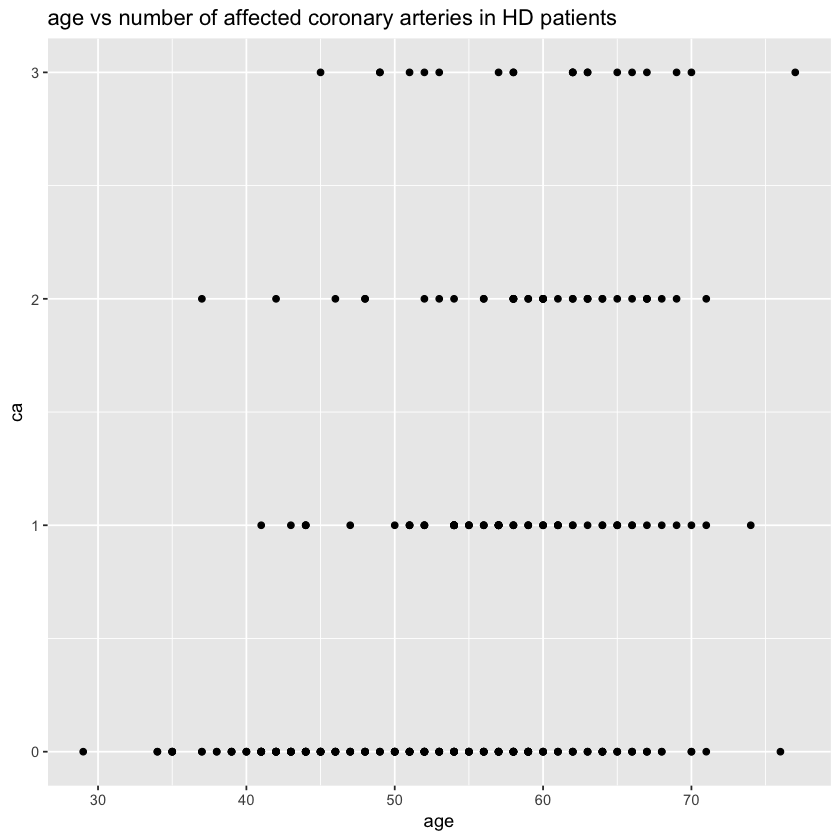

In [35]:
# VISUALISING THE DATA (A)

ggplot(heart_disease, aes(age, ca)) + geom_point() + ggtitle("age vs number of affected coronary arteries in HD patients")

#interpretation - age is clearly a factor in degree of severity (with older patients more likely to have up to 3 affected arteries and much younger patients with 0 - 1 affected arteries + single outlier having 2 affected arteries )

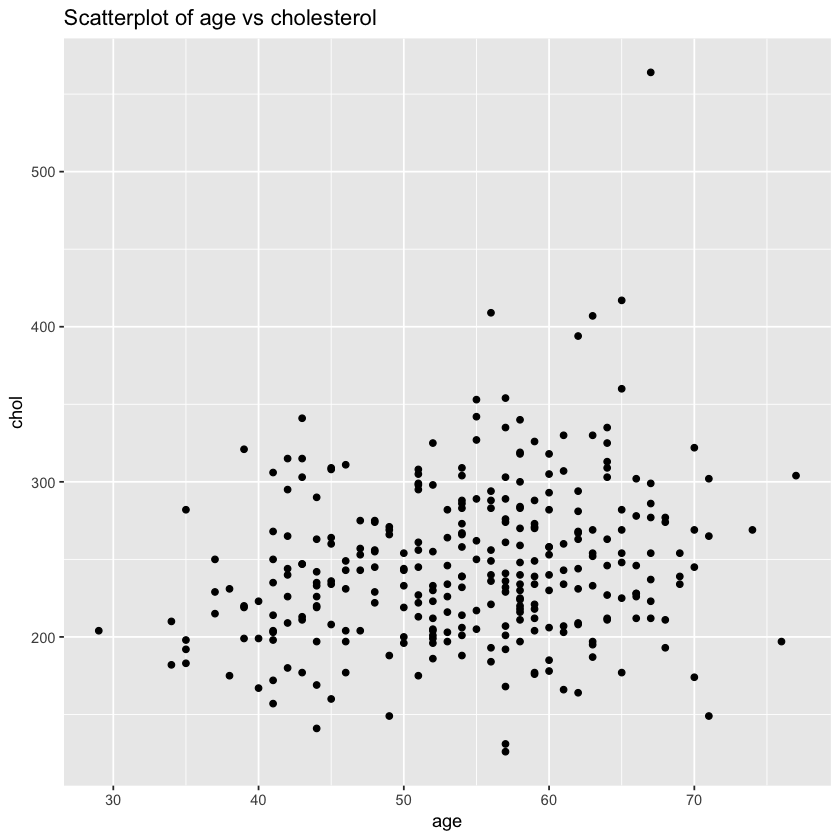

In [36]:
# VISUALISING THE DATA (B)

ggplot(heart_disease, aes(age, chol)) + geom_point() + ggtitle("Scatterplot of age vs cholesterol")

#interpretation - there is an increased risk of hypercholesterolaemia (>240mg/dL) with advancing age - seen in patients above 40 years of age

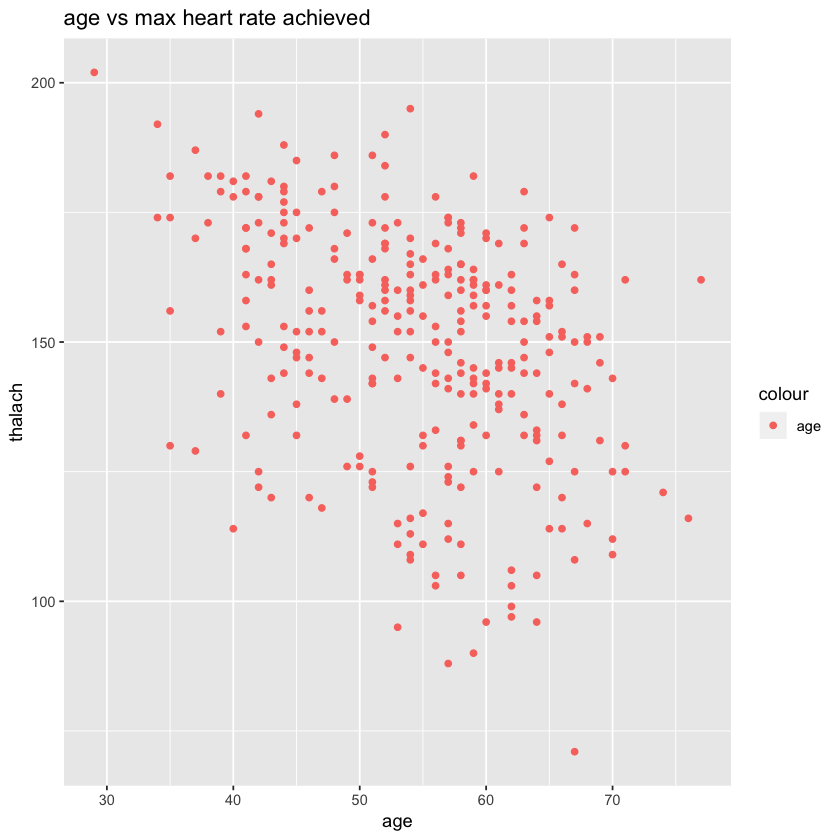

In [37]:
# VISUALISING THE DATA (3)

ggplot(heart_disease, aes(age, thalach, color = "age")) + geom_point() + ggtitle("age vs max heart rate achieved")

#interpretation - no real pattern here besides to note that most patients have abnormal heart rate values here (>100 bpm), but this is context dependent and not necessarily reflective of their underlying heart disease

In [30]:
# SCALING THE DATA
#As mean values vary across all the patient characteristics (from 0.1485 through to 246.7), the datasets will be scaled to normalise the range of all features in the dataset. This will ensure that each feature contributes approximately proportionally to final distance
scaled <- scale(heart_disease)

head(scaled)

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0.9553421,0.6850692,-2.2480557,0.75627397,-0.26446281,2.3904835,1.0150052,0.01716893,-0.69548,1.0855423,2.2708221,-0.7099569,0.6580440,-0.76293570
1.3966052,0.6850692,0.8765355,1.60855891,0.75915934,-0.4169448,1.0150052,-1.81889638,1.43311,0.3965257,0.6480412,2.5007438,-0.8639966,0.86501864
-1.9128686,0.6850692,0.8765355,-0.66420094,-0.34171732,-0.4169448,1.0150052,-0.90086373,1.43311,1.3439235,0.6480412,1.4305102,1.1653908,0.05104147
-1.9128686,0.6850692,-0.1649949,-0.09601098,0.06386882,-0.4169448,-0.9951031,1.63465503,-0.69548,2.1190672,2.2708221,-0.7099569,-0.8639966,-0.76293570
-1.4716054,-1.4548891,-1.2065253,-0.09601098,-0.82455796,-0.4169448,1.0150052,0.97891742,-0.69548,0.3103986,-0.9747397,-0.7099569,-0.8639966,-0.76293570
0.1831315,0.6850692,-1.2065253,-0.66420094,-0.20652194,-0.4169448,-0.9951031,1.24121247,-0.69548,-0.2063639,-0.9747397,-0.7099569,-0.8639966,-0.76293570


In [40]:
# GROUPING THE PATIENTS 

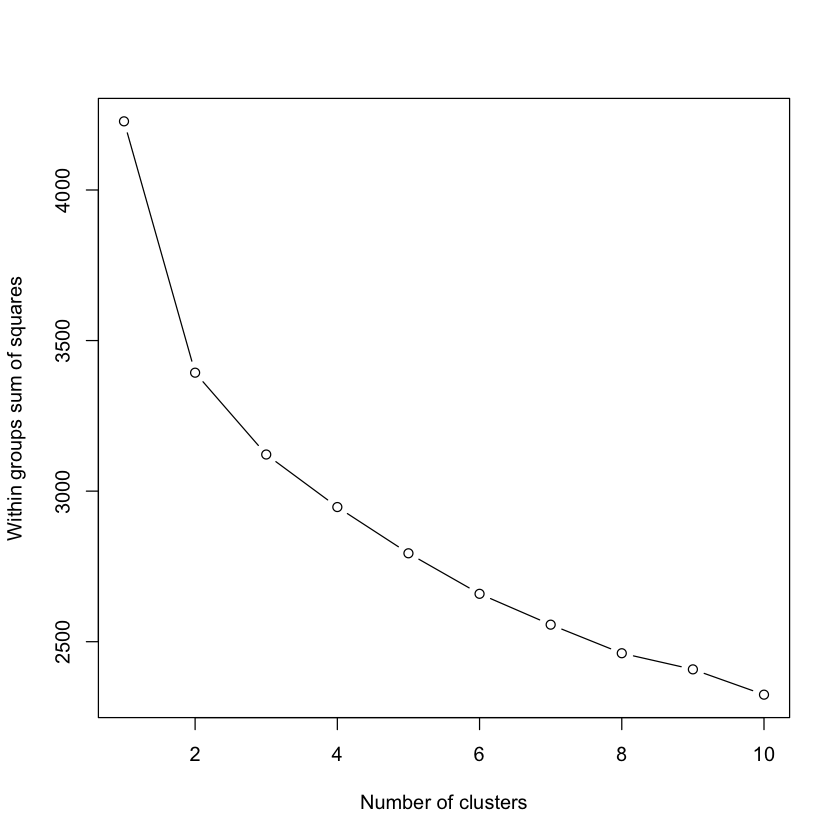

In [42]:
#ELBOW PLOT APPROACH
#Initialising total within sum of squares error: wss
wss <- 0
#For 1 - 10 cluster centres
for (i in 1:10) {
    km.out <- kmeans(scaled, centers = i, nstart = 20)
    #saving total within sum of squares to wss variable
    wss[i] <- km.out$tot.withinss
}

#Plot total within sum of squares vs number of clusters
plot(1:10, wss, type = "b", xlab = "Number of clusters", ylab = "Within groups sum of squares")

#interpretation - the 'elbow' in the plot below appears in 3 which implies there are inherently 3 clusters in the data, therefore set k <- 3

In [44]:
# Set seed for reproducible results
seed_val <- 10
set.seed(seed_val)

In [45]:
#Select a number of clusters
k <- 3

In [46]:
#Create the kmeans model
km_clustOne <- kmeans(scaled, centers = k, nstart = 1)

km_clustOne

K-means clustering with 3 clusters of sizes 92, 41, 170

Cluster means:
         age        sex         cp    trestbps       chol        fbs
1  0.2946464  0.3129025  0.6387948  0.08432758  0.1440624 -0.2948827
2  0.3203536  0.1631281 -0.1903981  0.36962763 -0.0944087  2.3904835
3 -0.2367174 -0.2086781 -0.2997812 -0.13478159 -0.0551940 -0.4169448
      restecg     thalach       exang    oldpeak       slope         ca
1  0.19566755 -0.83243893  0.78527852  0.8702246  0.64804121  0.6511010
2  0.08349158  0.08007709 -0.07247796 -0.1160355  0.05434089  0.3080701
3 -0.12602688  0.43118365 -0.40749428 -0.4429600 -0.36381040 -0.4266598
         thal         num
1  0.74627819  1.05081778
2  0.02695395  0.03118837
3 -0.41036886 -0.57619976

Clustering vector:
  [1] 2 1 1 3 3 3 1 3 1 2 3 3 2 3 2 3 3 3 3 3 3 2 3 1 1 3 3 3 3 1 3 2 3 3 3 3 1
 [38] 1 1 2 1 3 3 2 3 1 3 1 2 2 3 3 3 3 1 1 3 3 3 3 1 3 1 2 1 1 3 3 1 3 3 2 1 3
 [75] 3 3 1 3 3 1 1 3 3 2 3 3 3 3 3 3 3 1 1 3 3 3 1 1 3 3 3 3 3 2 1 3 1 3 1 1 1


In [55]:
#Attempting a different cluster variation with nstart = 20 and seed.val = 40
seed_val <- 40
set.seed(seed_val)

k <- 3

km_clustTwo <- kmeans(scaled, centers = k, nstart = 20)
km_clustTwo

K-means clustering with 3 clusters of sizes 120, 80, 103

Cluster means:
          age        sex         cp   trestbps       chol         fbs
1 -0.32983694  0.6850692 -0.4427363 -0.1040603 -0.2334001  0.02756468
2  0.08798413 -1.4548891 -0.1910332 -0.1109260  0.2171707 -0.17129482
3  0.31593886  0.3318722  0.6641846  0.2073914  0.1032461  0.10093033
     restecg    thalach      exang    oldpeak      slope         ca       thal
1 -0.1240562  0.5424876 -0.4116680 -0.3843599 -0.3661968 -0.3532124 -0.1410274
2 -0.1031176  0.2073328 -0.3761915 -0.4313709 -0.2647730 -0.3487531 -0.8322875
3  0.2246228 -0.7930596  0.7718007  0.7828432  0.6322861  0.6823858  0.8107406
         num
1 -0.5051763
2 -0.6611885
3  1.1020994

Clustering vector:
  [1] 1 3 3 1 2 1 3 2 3 3 1 2 3 1 1 1 1 1 2 1 1 2 1 3 3 2 2 2 1 3 2 3 1 1 1 1 3
 [38] 3 3 1 3 1 2 1 2 3 1 3 2 1 2 1 1 1 3 3 1 1 1 1 3 2 3 2 3 3 1 1 3 1 2 3 3 1
 [75] 1 2 3 2 1 3 1 2 1 3 1 1 1 2 2 2 1 3 3 2 2 1 3 3 1 1 1 1 2 2 3 1 3 1 3 3 3
[112] 3 1 3 3 1 1 2

In [57]:
#COMPARING PATIENT CLUSTERS

#Add cluster assignments to the data
heart_disease["km_clustOne"] <- km_clustOne$cluster
heart_disease["km_clustTwo"] <- km_clustTwo$cluster

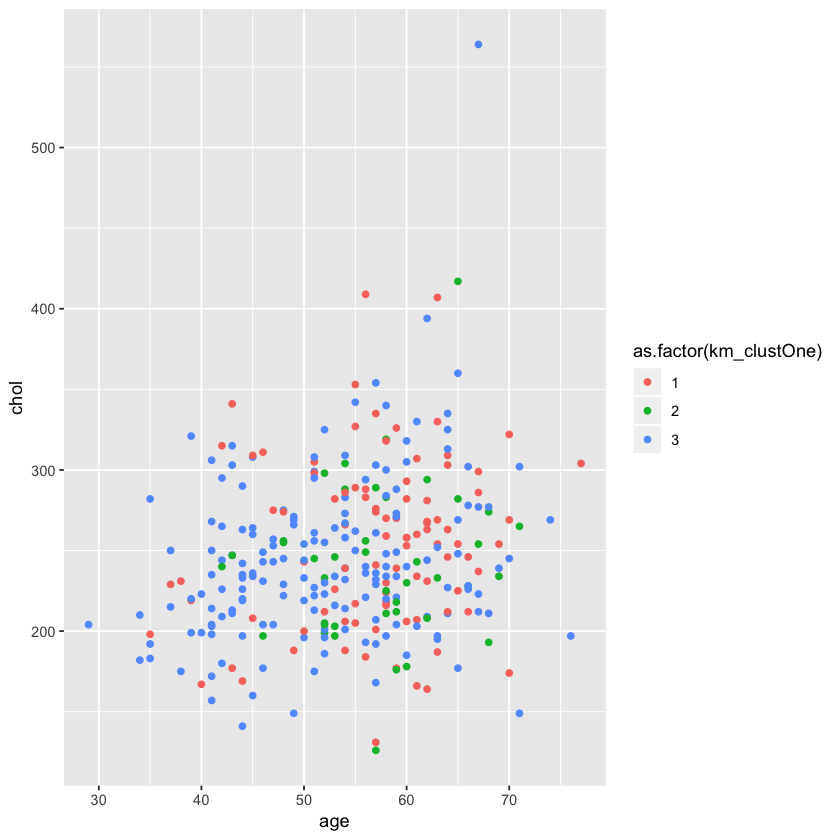

In [58]:
#Create and print the plot of age and chol for the first clustering assignment
km_plotOne <- ggplot(heart_disease, aes(x = age, y = chol, color = as.factor(km_clustOne))) + geom_point()
km_plotOne

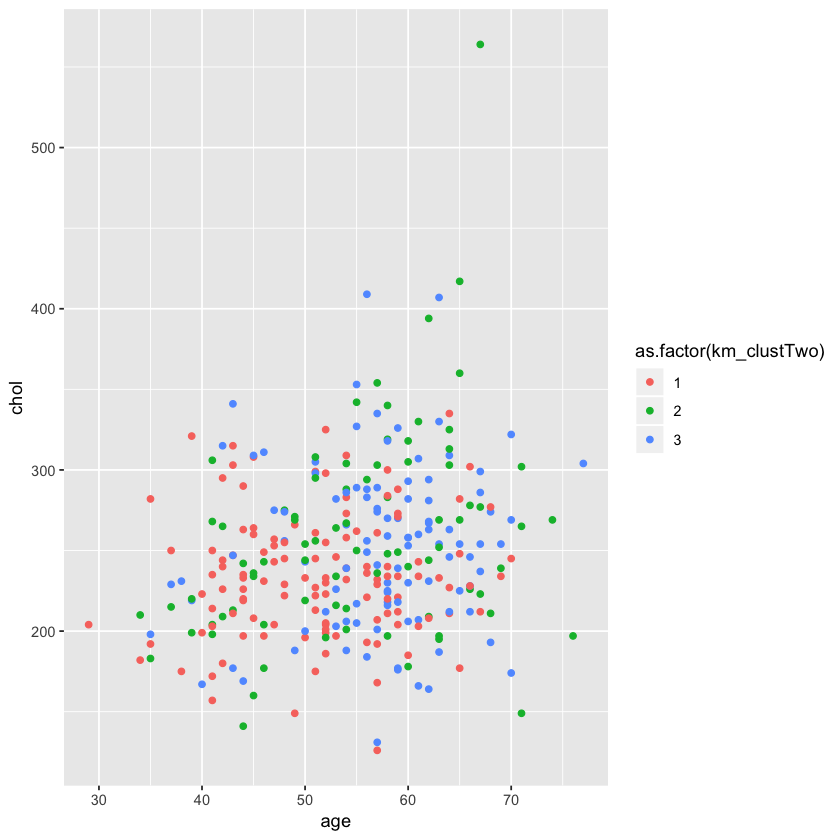

In [59]:
#Create and print the plot of age and chol for the second clustering algorithm
km_plotTwo <- ggplot(heart_disease, aes(x= age, y = chol, color = as.factor(km_clustTwo))) + geom_point()
km_plotTwo

In [49]:
# HIERARCHICAL CLUSTERING: AN ALTERNATIVE CLUSTERING APPROACH TO KMEANS

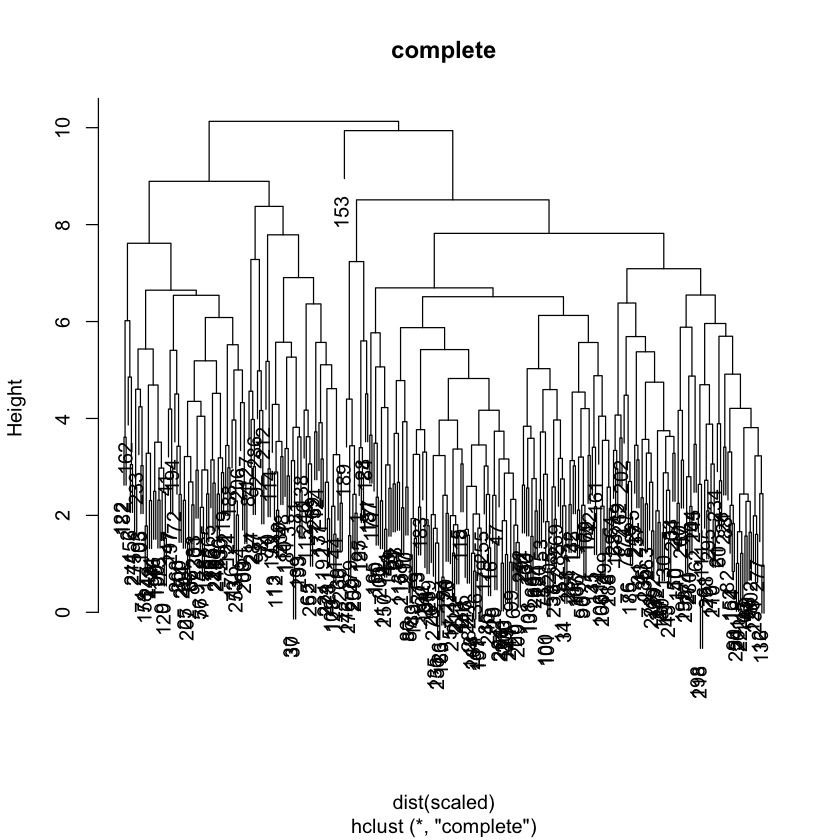

In [50]:
#Execute hierarchical clustering with complete linkage
hier_clustOne <- hclust(dist(scaled), method = "complete")

#Print the dendrogram
plot(hier_clustOne, main = "complete")

#interpretation - multiple different ways to measure disimilarity between clusters in hierarchical clustering. The "complete" method shown below records the largest dissimilarity between any two points in the clusters i.e. the maximum distance between 2 sets of different clusters. 

In [51]:
#Get cluster assignments based on the number of selected clusters
hc_one_assign <- cutree(hier_clustOne, k = 3)
#k of 3 chosen as elbow plot for kmeans algorithm implies there are 3 clusters within the data
hc_one_assign

[1] 1 2 2 2 1 1 2 1 2 2 1 1 2 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 2 1 2 1 1 1 1 2
 [38] 2 2 1 2 1 1 1 1 2 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 2 2 1 1 2 2 1 2 2 2
 [75] 1 1 2 1 1 2 2 1 1 2 1 1 1 1 1 1 1 2 2 1 1 1 2 2 1 1 1 1 1 1 2 1 1 1 2 2 1
[112] 2 1 2 2 1 1 1 2 2 2 2 1 2 1 1 2 2 1 1 1 1 1 1 1 1 2 2 2 1 1 1 1 2 1 1 2 1
[149] 1 1 1 1 3 2 2 2 1 2 2 1 1 2 1 1 1 1 1 1 1 1 2 1 1 1 2 2 1 2 1 1 2 2 1 1 1
[186] 1 1 2 1 2 1 2 2 2 1 2 1 1 1 1 1 1 1 1 1 2 2 2 1 1 1 2 1 2 1 1 1 1 1 1 1 1
[223] 1 2 1 1 1 1 2 2 1 2 2 1 1 2 2 1 1 1 1 1 1 2 1 2 2 2 2 1 1 2 2 1 1 1 1 1 1
[260] 1 1 1 1 1 2 2 1 2 1 1 2 1 2 1 2 1 1 1 1 1 2 1 2 1 1 2 2 1 1 1 1 1 2 2 1 1
[297] 2 1 1 2 2 1 1

Warning message in graphics:::plotHclust(n1, merge, height, order(x$order), hang, :
""method" is not a graphical parameter"Warning message in graphics:::plotHclust(n1, merge, height, order(x$order), hang, :
""method" is not a graphical parameter"Warning message in axis(2, at = pretty(range(height)), ...):
""method" is not a graphical parameter"Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
""method" is not a graphical parameter"

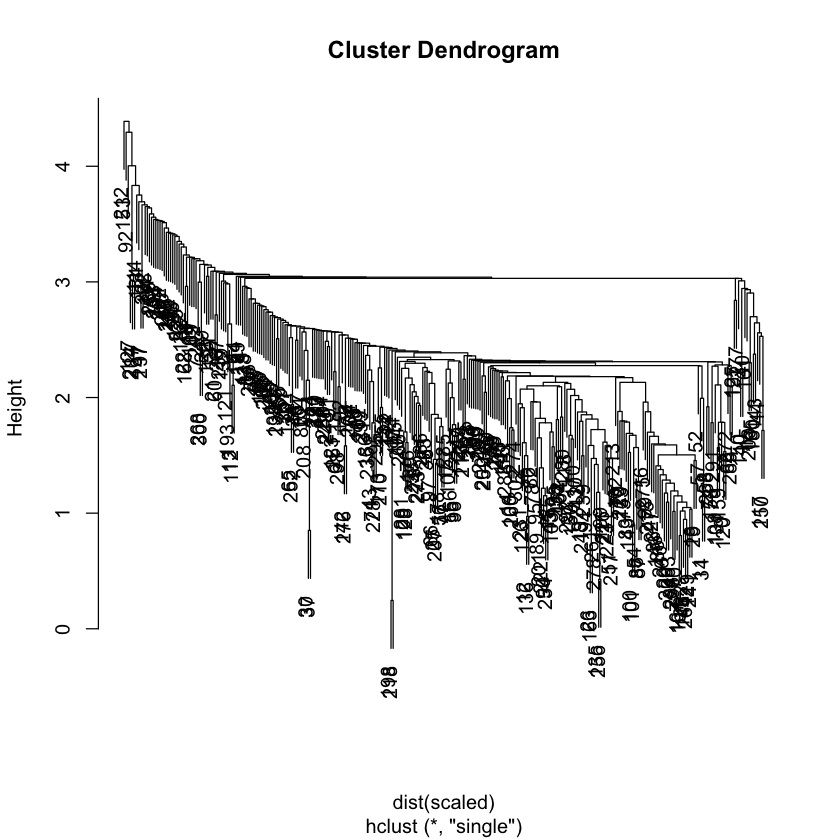

In [53]:
#Hierarchical Clustering using alternative linkage method - "Single linkage"
hier_clustTwo <- hclust(dist(scaled), method = "single")

#Print the dendrogram
plot(hier_clustTwo, method = "single")

In [54]:
#Get number of cluster assignments based on number of selected clusters
hc_two_assign <- cutree(hier_clustTwo, k = 3)
hc_two_assign

[1] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [38] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 [75] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[112] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[149] 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[186] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 1
[223] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[260] 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
[297] 1 1 1 1 1 1 1

In [60]:
#COMPARISON OF CLUSTER RESULTS

In [62]:
#Add assignment of chosen hierarchical linkage method
hc_one_assign -> heart_disease["hc_clust"]

#Remove all categorical variables (sex, first_clust and second_clust)
hd_simple <- heart_disease %>%
                select(-sex, -km_clustOne, -km_clustTwo)

#Get the mean and standard deviation summary statistics
clust_summary <- do.call(data.frame, aggregate(. ~ hc_clust, data = hd_simple, function(x) c(avg = mean(x), sd = sd(x))))
clust_summary                                               

hc_clust,age.avg,age.sd,cp.avg,cp.sd,trestbps.avg,trestbps.sd,chol.avg,chol.sd,fbs.avg,...,oldpeak.avg,oldpeak.sd,slope.avg,slope.sd,ca.avg,ca.sd,thal.avg,thal.sd,num.avg,num.sd
1,52.95455,9.125907,2.853535,0.9631603,130.5909,17.11322,243.1616,46.89338,0.1313131,...,0.5414141,0.7219559,1.404040,0.5773947,0.2878788,0.5986063,3.969697,1.753630,0.2323232,0.5103653
2,56.85577,8.367086,3.740385,0.6384933,133.9423,18.38257,250.3654,51.37527,0.1826923,...,1.9826923,1.2560102,1.971154,0.5111710,1.3846154,1.0363087,6.076923,1.586914,2.2884615,1.0582370
3,67.00000,NA,3.000000,NA,115.0000,NA,564.0000,NA,0.0000000,...,1.6000000,NA,2.000000,NA,0.0000000,NA,7.000000,NA,0.0000000,NA


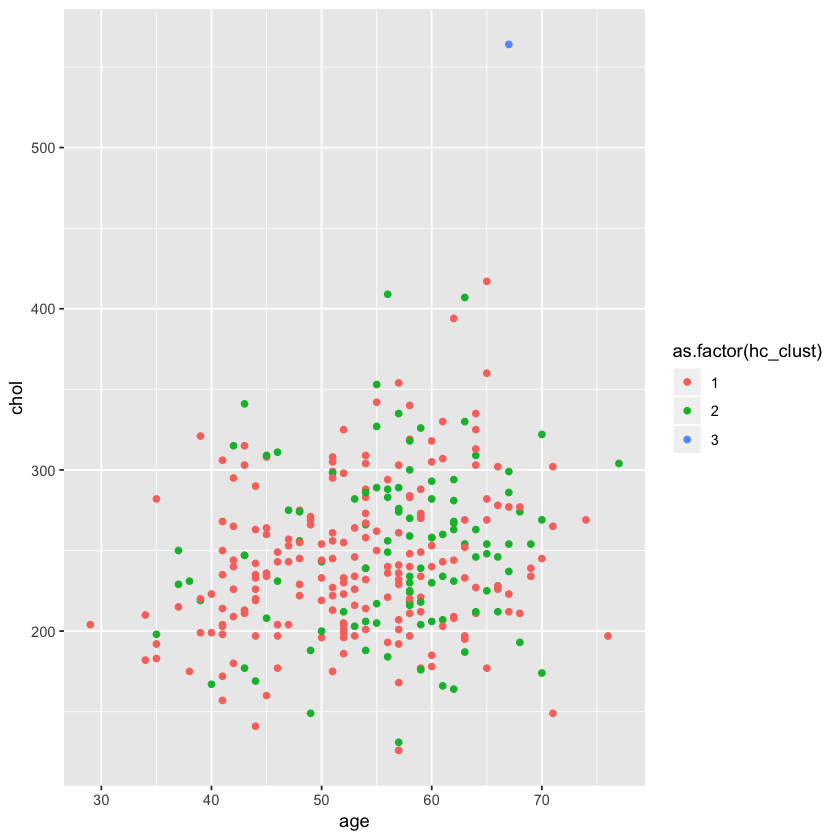

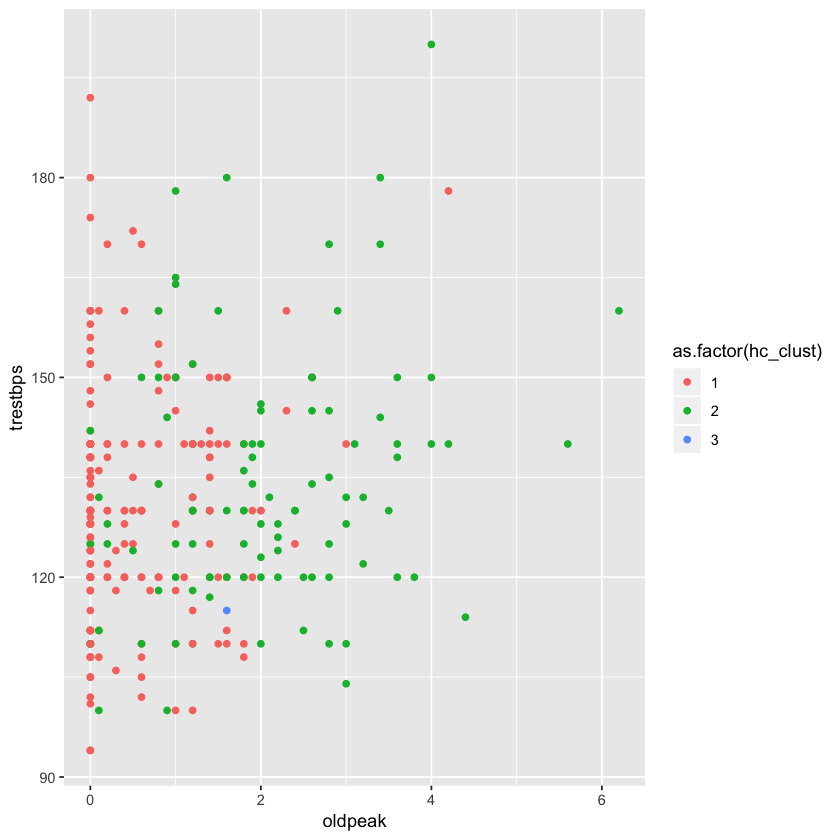

In [63]:
#Visualising the cluster contents 
#An alternative way to view the cluster contents in addition to looking at the distributions of variables in each of the hierarchical clustering runs

#Plot of age and chol
plot_one <- ggplot(heart_disease, aes(x = age, y = chol, color = as.factor(hc_clust))) + geom_point()
plot_one

#Plot oldpeak and trestbps
plot_two <- ggplot(heart_disease, aes(x = oldpeak, y = trestbps, color = as.factor(hc_clust))) + geom_point()
plot_two

In [68]:
#COMPARING KMEANS CLUSTER METHOD WITH HIERARCHICAL CLUSTER METHOD

table(km_clustOne$cluster, hc_one_assign)

#interpretation - the hierarchical clustering method appears to assign most of the observations to cluster 2 while the k-means model assigns most observations to cluster 3. Barely any observations from cluster 3 feature in the hc visualisation graphs above.

   hc_one_assign
      1   2   3
  1  10  82   0
  2  26  15   0
  3 162   7   1